In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math

In [212]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [213]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [214]:
trainx = train_X.reshape(60000,784)
testx = test_X.reshape(10000,784)

In [215]:
xtrain = trainx[10000:].T
ytrain = train_y[10000:]
xtrain = xtrain/255

In [216]:
xval = trainx[0:10000].T
yval = train_y[0:10000]
xval = xval/255

In [217]:
xtest = testx.T
xtest = xtest/255

In [218]:
train_y.shape

(60000,)

In [219]:
xtrain.shape

(784, 50000)

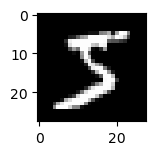

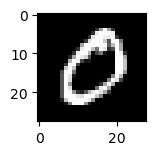

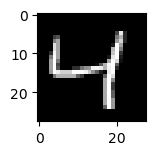

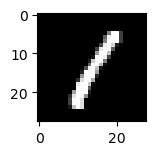

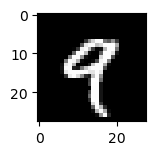

In [220]:
from matplotlib import pyplot
for i in range(5):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

## 3 Layer

In [31]:
def init_weights():
    w1 = np.random.rand(20, 784) - 0.5
    b1 = np.random.rand(20, 1) - 0.5
    w2 = np.random.rand(10, 20) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    w3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2, w3, b3

In [32]:
def forward_propagation(w1, b1, w2, b2, w3, b3, x):
    z1 = w1.dot(x) + b1
    a1 = np.maximum(0, z1) # ReLU
    z2 = w2.dot(a1) + b2
    a2 = np.maximum(0, z2)
    z3 = w3.dot(a2) + b3
    a3 = np.exp(z3) / sum(np.exp(z3)) # softmax
    return z1, a1, z2, a2, z3, a3

In [33]:
def one_hot_encoding(y): 
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    return one_hot_y.T

In [34]:
def deriv_relu(z):
    return z > 0

In [35]:
def back_propagation(z1, a1, z2, a2, z3, a3, w1, w2, w3, x, y):
    one_hot_y = one_hot_encoding(y)
    d_z3 = a3 - one_hot_y
    d_w3 = d_z3.dot(a2.T) * (1 / train.shape[0])
    d_b3 = np.sum(d_z3) * (1 / train.shape[0])
    
    d_z2 = w3.T.dot(d_z3) * deriv_relu(z2)
    d_w2 = d_z2.dot(a1.T) * (1 / train.shape[0])
    d_b2 = np.sum(d_z2) * (1 / train.shape[0])
    
    d_z1 = w2.T.dot(d_z2) * deriv_relu(z1)
    d_w1 = d_z1.dot(x.T) * (1 / train.shape[0])
    d_b1 = np.sum(d_z1) * (1 / train.shape[0])
    return d_w1, d_b1, d_w2, d_b2, d_w3, d_b3

In [36]:
def update_weights(w1, b1, w2, b2, w3, b3, d_w1, d_b1, d_w2, d_b2, d_w3, d_b3, lr):
    w1 = w1 - lr * d_w1
    w2 = w2 - lr * d_w2
    w3 = w3 - lr * d_w3
    b1 = b1 - lr * d_b1
    b2 = b2 - lr * d_b2
    b3 = b3 - lr * d_b3
    return w1, w2, w3, b1, b2, b3

In [37]:
def predict(a):
    return np.argmax(a, 0)

def score(pred, y):
    return np.sum(pred == y)/y.size

In [113]:
def gradient_descent(x, y, epochs, lr):
    w1, b1, w2, b2, w3, b3 = init_weights()
    for i in range(epochs):
        z1, a1, z2, a2, z3, a3 = forward_propagation(w1, b1, w2, b2, w3, b3, x)
        d_w1, d_b1, d_w2, d_b2, d_w3, d_b3 = back_propagation(z1, a1, z2, a2, 
                                                              z3, a3, w1, w2, w3, x, y)
        w1, w2, w3, b1, b2, b3 = update_weights(w1, b1, w2, b2, w3, b3, 
                                        d_w1, d_b1, d_w2, d_b2, d_w3, d_b3, lr)
        if i % 100 == 0:
            print(i, score(predict(a3), y))
    return w1, w2, w3, b1, b2, b3

In [246]:
w1, w2, w3, b1, b2, b3 = gradient_descent(xtrain, ytrain, 701, 0.1)

0 0.09648
100 0.78632
200 0.86782
300 0.88988
400 0.89396
500 0.91064
600 0.9053
700 0.9226


In [222]:
def predict_test(w1, w2, w3, b1, b2, b3, x):
    z1, a1, z2, a2, z3, a3 = forward_propagation(w1, b1, w2, b2, w3, b3, x)
    pred = predict(a3)
    return pred

In [225]:
print('Accuracy:', 100*score(predict_test(w1, w2, w3, b1, b2, b3, xval), yval), '%')

Accuracy: 89.92 %


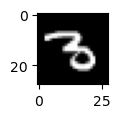

Prediction: 5
Actual: 3


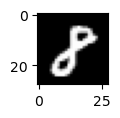

Prediction: 5
Actual: 8


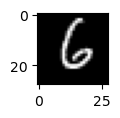

Prediction: 7
Actual: 6


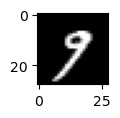

Prediction: 8
Actual: 9


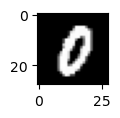

Prediction: 4
Actual: 0


In [245]:
for i in range(30,35):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    print('Prediction:', predict_test(w1, w2, w3, b1, b2, b3, xval)[i])
    print('Actual:', yval[i])

## 2 Layer

In [108]:
def init_weights2():
    w1 = np.random.rand(20, 784) - 0.5
    b1 = np.random.rand(20, 1) - 0.5
    w2 = np.random.rand(10, 20) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

In [101]:
def forward_propagation2(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = np.maximum(0, z1) # ReLU
    z2 = w2.dot(a1) + b2
    a2 = np.exp(z2) / sum(np.exp(z2))
    return z1, a1, z2, a2

In [102]:
def back_propagation2(z1, a1, z2, a2, w1, w2, x, y):
    one_hot_y = one_hot_encoding(y)
    
    d_z2 = a2 - one_hot_y
    d_w2 = d_z2.dot(a1.T) * (1 / train.shape[0])
    d_b2 = np.sum(d_z2) * (1 / train.shape[0])
    
    d_z1 = w2.T.dot(d_z2) * deriv_relu(z1)
    d_w1 = d_z1.dot(x.T) * (1 / train.shape[0])
    d_b1 = np.sum(d_z1) * (1 / train.shape[0])
    return d_w1, d_b1, d_w2, d_b2

In [103]:
def update_weights2(w1, b1, w2, b2, d_w1, d_b1, d_w2, d_b2, lr):
    w1 = w1 - lr * d_w1
    w2 = w2 - lr * d_w2
    b1 = b1 - lr * d_b1
    b2 = b2 - lr * d_b2
    return w1, w2, b1, b2

In [112]:
def gradient_descent2(x, y, epochs, lr):
    w1, b1, w2, b2 = init_weights2()
    for i in range(epochs):
        z1, a1, z2, a2 = forward_propagation2(w1, b1, w2, b2, x)
        d_w1, d_b1, d_w2, d_b2 = back_propagation2(z1, a1, z2, a2, w1, w2, x, y)
        w1, w2, b1, b2 = update_weights2(w1, b1, w2, b2, d_w1, d_b1, d_w2, d_b2, lr)
        if i % 100 == 0:
            print(i, score(predict(a2), y))
    return w1, w2, b1, b2

In [226]:
w1, w2, b1, b2 = gradient_descent2(xtrain, ytrain, 701, 0.1)

0 0.11476
100 0.84242
200 0.87922
300 0.89784
400 0.90784
500 0.91456
600 0.91936
700 0.92326


In [227]:
xtrain.shape

(784, 50000)

In [228]:
def predict_test2(w1, w2, b1, b2, x):
    z1, a1, z2, a2 = forward_propagation2(w1, b1, w2, b2, x)
    pred = predict(a2)
    return pred

In [230]:
print('Accuracy:', score(predict_test2(w1, w2, b1, b2, xval), yval)*100, '%')

Accuracy: 91.93 %


In [234]:
predict_test2(w1, w2, b1, b2, xval)[0]

5

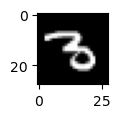

Prediction: 1
Actual: 3


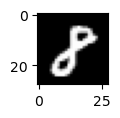

Prediction: 8
Actual: 8


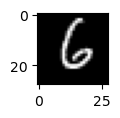

Prediction: 6
Actual: 6


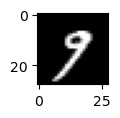

Prediction: 7
Actual: 9


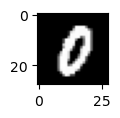

Prediction: 0
Actual: 0


In [243]:
for i in range(30,35):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    print('Prediction:', predict_test2(w1, w2, b1, b2, xval)[i])
    print('Actual:', yval[i])